In [116]:
import numpy as np                               #import packages numpy(for numerical analysis)
import pandas as pd                              #import packages pandas(to generate univariate analysis)
import sweetviz as sv
import matplotlib.pyplot as plt                  #import packages matplotlib(generating visualization with pyplot)
import seaborn as sns                            #import packages seaborn(plot statistical graphs in python)

import os,sys,warnings 
warnings.filterwarnings('ignore')                #standard libraries
from pandas_profiling import ProfileReport

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score

In [3]:
drug_train=pd.read_csv('D:/sharan personal/INSAID GCD PROGRAMME/Data Science Projects/Machine Learning Projects/Drug Prediction/drug_train.csv')    #read csv file using pandas
print('Data Shape:', drug_train.shape)

Data Shape: (160, 7)


In [4]:
drug_train.head()                     #viewing first few rows of dataset

,Id,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,79,32,F,LOW,NORMAL,10.840,drugX
1,197,52,M,NORMAL,HIGH,9.894,drugX
2,38,39,F,NORMAL,NORMAL,9.709,drugX
3,24,33,F,LOW,HIGH,33.486,DrugY
4,122,34,M,NORMAL,HIGH,22.456,DrugY


In [5]:
drug_train.info()                  #information about dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           160 non-null    int64  
 1   Age          160 non-null    int64  
 2   Sex          160 non-null    object 
 3   BP           160 non-null    object 
 4   Cholesterol  160 non-null    object 
 5   Na_to_K      160 non-null    float64
 6   Drug         160 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.9+ KB


In [6]:
drug_train.isna().sum()            #check if any missing values

Id             0
Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [7]:
drug_train.describe()            #statistical information of dataframe

,Id,Age,Na_to_K
count,160.000000,160.000000,160.000000
mean,99.075000,45.387500,16.194988
std,59.374894,16.101481,7.254689
min,0.000000,15.000000,6.269000
25%,45.500000,32.000000,10.445250
50%,100.500000,46.000000,14.076500
75%,149.500000,58.250000,19.480750
max,199.000000,74.000000,38.247000


In [8]:
drug_train.nunique()

Id             160
Age             53
Sex              2
BP               3
Cholesterol      2
Na_to_K        159
Drug             5
dtype: int64

In [9]:
my_report = sv.analyze(drug_train)
my_report.show_html()                        #automated EDA report

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [10]:
drug_train['Drug'].value_counts()          #number of counts in Drug

DrugY    76
drugX    43
drugA    17
drugB    13
drugC    11
Name: Drug, dtype: int64

In [11]:
drug_train['Sex'].value_counts()

M    83
F    77
Name: Sex, dtype: int64

In [12]:
drug_train['Cholesterol'].value_counts()

HIGH      88
NORMAL    72
Name: Cholesterol, dtype: int64

In [13]:
drug_train['BP'].value_counts()

HIGH      62
NORMAL    51
LOW       47
Name: BP, dtype: int64

In [14]:
drug_train['Age'].value_counts()

39    6
23    6
28    6
47    6
32    5
60    5
49    5
50    5
37    5
58    5
41    4
56    4
57    4
34    4
45    4
31    4
24    4
22    4
67    4
72    4
61    3
64    3
65    3
51    3
68    3
15    3
74    3
43    3
20    3
40    3
46    2
35    2
69    2
62    2
48    2
70    2
59    2
36    2
73    2
53    2
52    2
42    2
26    2
21    1
18    1
16    1
66    1
29    1
63    1
33    1
38    1
55    1
30    1
Name: Age, dtype: int64

In [15]:
drug_test=pd.read_csv('D:/sharan personal/INSAID GCD PROGRAMME/Data Science Projects/Machine Learning Projects/Drug Prediction/drug_test.csv')    #read csv file using pandas
print('Data Shape:', drug_test.shape)

Data Shape: (40, 6)


In [16]:
drug_test.head()   

,Id,Age,Sex,BP,Cholesterol,Na_to_K
0,95,36,M,LOW,NORMAL,11.424
1,15,16,F,HIGH,NORMAL,15.516
2,30,18,F,NORMAL,NORMAL,8.750
3,158,59,F,LOW,HIGH,10.444
4,128,47,M,LOW,NORMAL,33.542


In [17]:
drug_test.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           40 non-null     int64  
 1   Age          40 non-null     int64  
 2   Sex          40 non-null     object 
 3   BP           40 non-null     object 
 4   Cholesterol  40 non-null     object 
 5   Na_to_K      40 non-null     float64
dtypes: float64(1), int64(2), object(3)
memory usage: 2.0+ KB


In [18]:
drug_test.isna().sum()

Id             0
Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
dtype: int64

In [19]:
drug_test.describe()     

,Id,Age,Na_to_K
count,40.00000,40.000000,40.000000
mean,101.20000,40.025000,15.642475
std,52.12667,17.778534,7.173492
min,9.00000,16.000000,7.261000
25%,65.75000,24.500000,10.735000
50%,94.00000,38.000000,12.867500
75%,148.50000,53.250000,19.100250
max,186.00000,74.000000,33.542000


In [20]:
drug_test.nunique()

Id             40
Age            31
Sex             2
BP              3
Cholesterol     2
Na_to_K        39
dtype: int64

In [21]:
my_report = sv.analyze(drug_test)
my_report.show_html() 

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [22]:
drug_test['Sex'].value_counts()

M    21
F    19
Name: Sex, dtype: int64

In [23]:
drug_test['Cholesterol'].value_counts()

NORMAL    25
HIGH      15
Name: Cholesterol, dtype: int64

In [24]:
drug_test['BP'].value_counts()

LOW       17
HIGH      15
NORMAL     8
Name: BP, dtype: int64

In [25]:
drug_test['Age'].value_counts()

18    2
19    2
38    2
26    2
42    2
47    2
49    2
36    2
16    2
35    1
51    1
53    1
43    1
54    1
55    1
59    1
65    1
28    1
32    1
29    1
66    1
25    1
23    1
22    1
20    1
17    1
74    1
70    1
69    1
68    1
61    1
Name: Age, dtype: int64

In [26]:
plt.figure(figsize=(15,8))
plt.title("Drug Types", fontsize=20, y=1.02)
sns.countplot(x = drug_train.Drug, palette="hot")
plt.show()

In [27]:
plt.figure(figsize=(15,8))
plt.title("Cholestrol Types", fontsize=20, y=1.02)
sns.countplot(x = drug_train.Cholesterol, palette="hot")
plt.show()

In [28]:
plt.figure(figsize=(15,8))
plt.title("Blood Pressure Types", fontsize=20, y=1.02)
sns.countplot(x = drug_train.BP, palette="hot")
plt.show()

In [29]:
plt.figure(figsize=(15,8))
plt.title("Sex", fontsize=20, y=1.02)
sns.countplot(x = drug_train.Sex, palette="hot")
plt.show()

In [30]:
plt.figure(figsize=(15,8))
plt.title("Age of Patients", fontsize=20, y=1.02)
sns.countplot(x = drug_train.Age, palette="hot")
plt.show()

In [31]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(15,8))
sns.histplot(drug_train["Na_to_K"], color="red", kde=True, bins=25)
plt.title("Sodium to Potassium ratio in patient's blood", fontsize=20, y=1.02)
ax.set_xlabel("Na_to_K",fontsize=15);

Imported AutoViz_Class version: 0.0.84. Call using:
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 does not show plot but creates them and saves them in AutoViz_Plots directory in your local machine.
Shape of your Data Set loaded: (160, 7)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  2
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  2
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
  

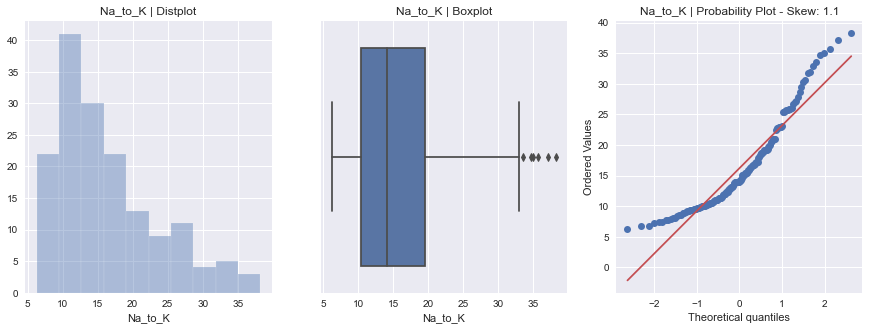

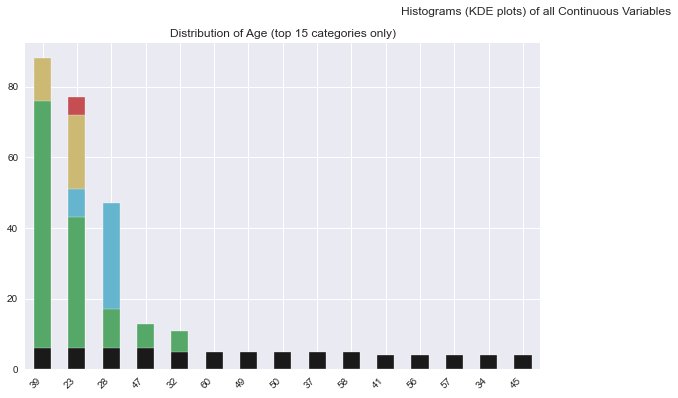

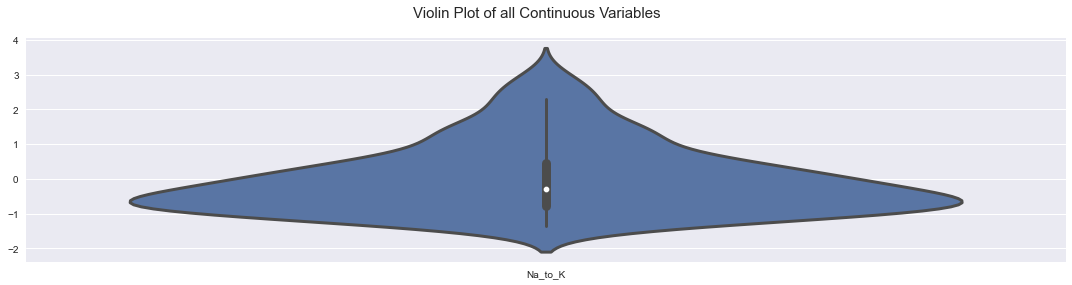

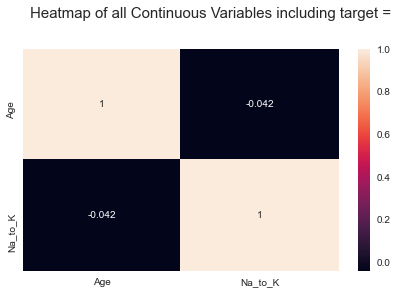

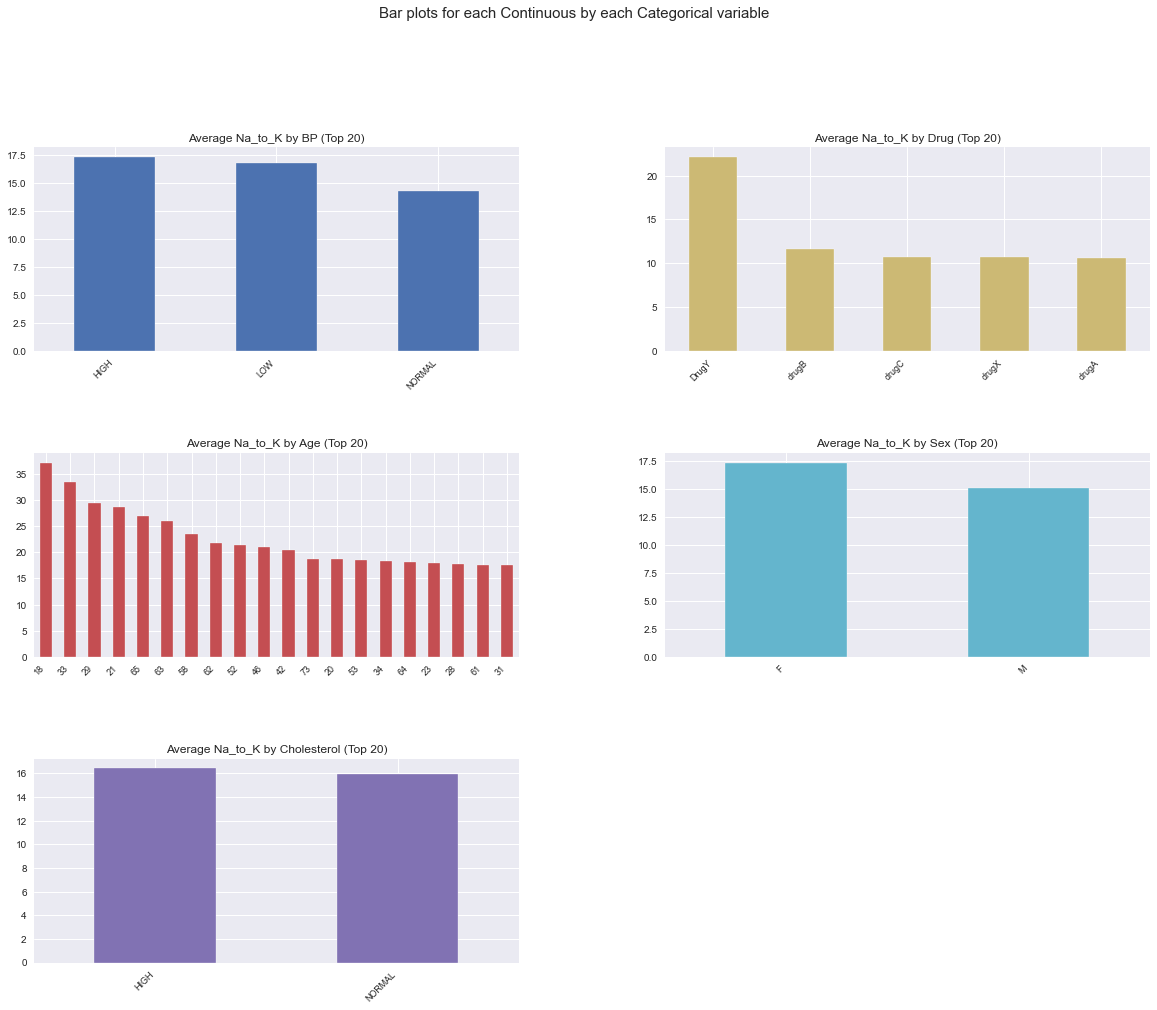

Time to run AutoViz (in seconds) = 1.221

 ###################### VISUALIZATION Completed ########################


In [32]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
df_train_av = AV.AutoViz('D:/sharan personal/INSAID GCD PROGRAMME/Data Science Projects/Machine Learning Projects/Drug Prediction/drug_train.csv')

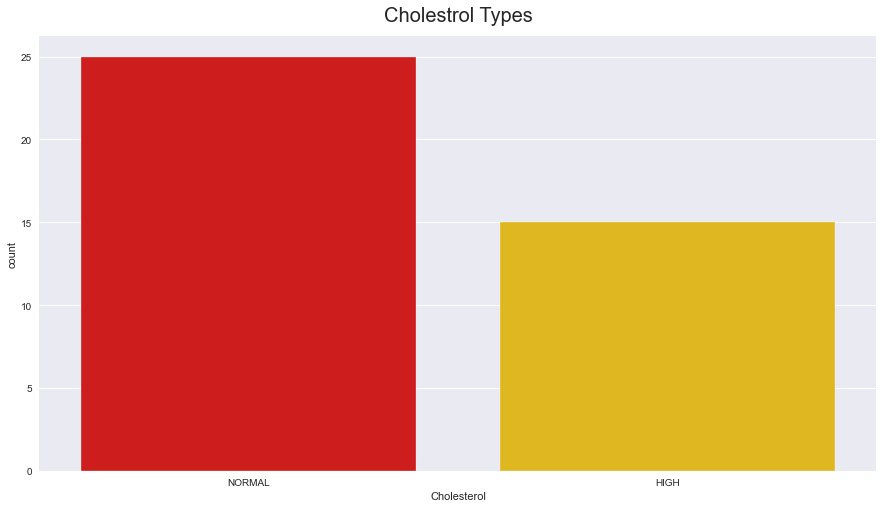

In [33]:
plt.figure(figsize=(15,8))
plt.title("Cholestrol Types", fontsize=20, y=1.02)
sns.countplot(x = drug_test.Cholesterol, palette="hot")
plt.show()

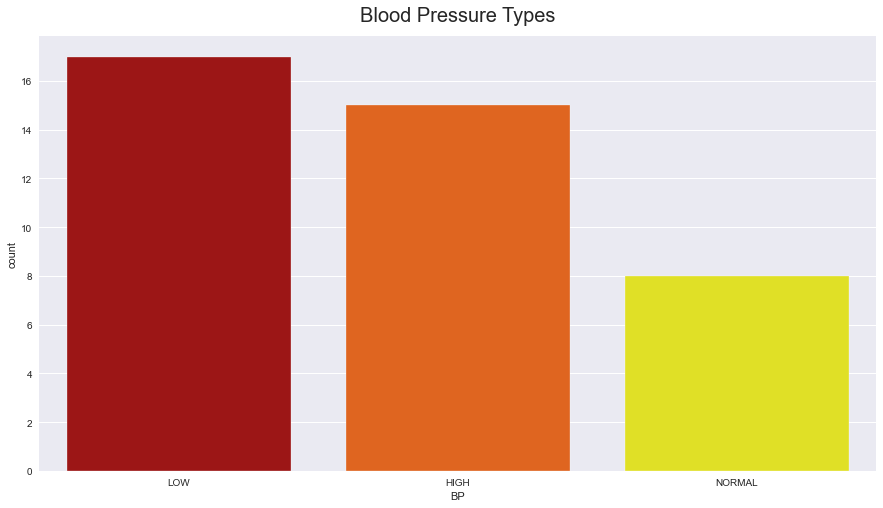

In [34]:
plt.figure(figsize=(15,8))
plt.title("Blood Pressure Types", fontsize=20, y=1.02)
sns.countplot(x = drug_test.BP, palette="hot")
plt.show()

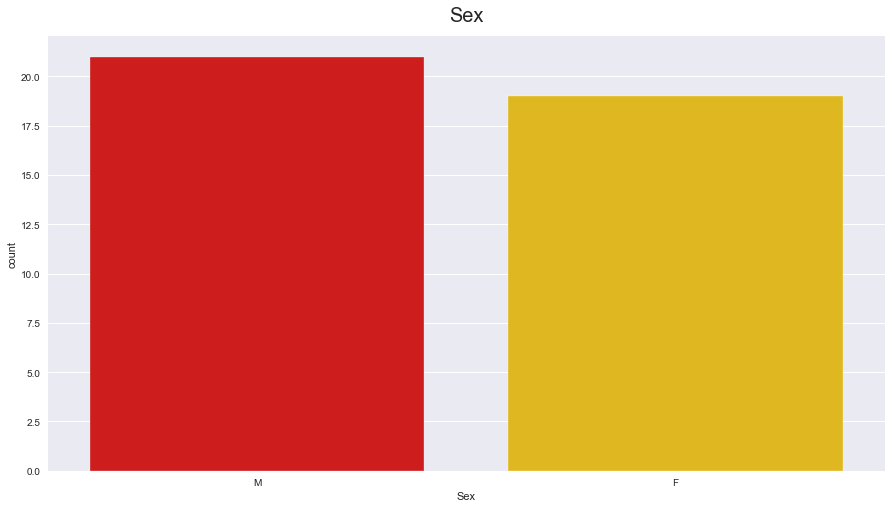

In [35]:
plt.figure(figsize=(15,8))
plt.title("Sex", fontsize=20, y=1.02)
sns.countplot(x = drug_test.Sex, palette="hot")
plt.show()

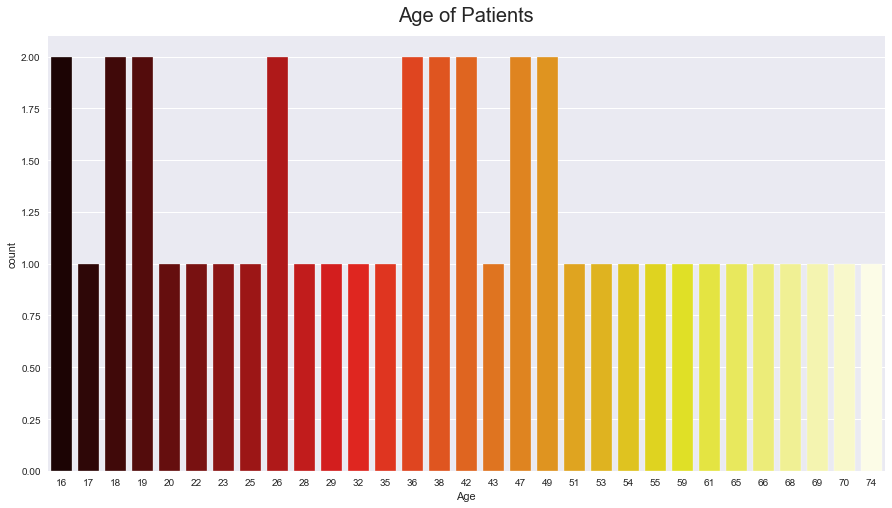

In [36]:
plt.figure(figsize=(15,8))
plt.title("Age of Patients", fontsize=20, y=1.02)
sns.countplot(x = drug_test.Age, palette="hot")
plt.show()

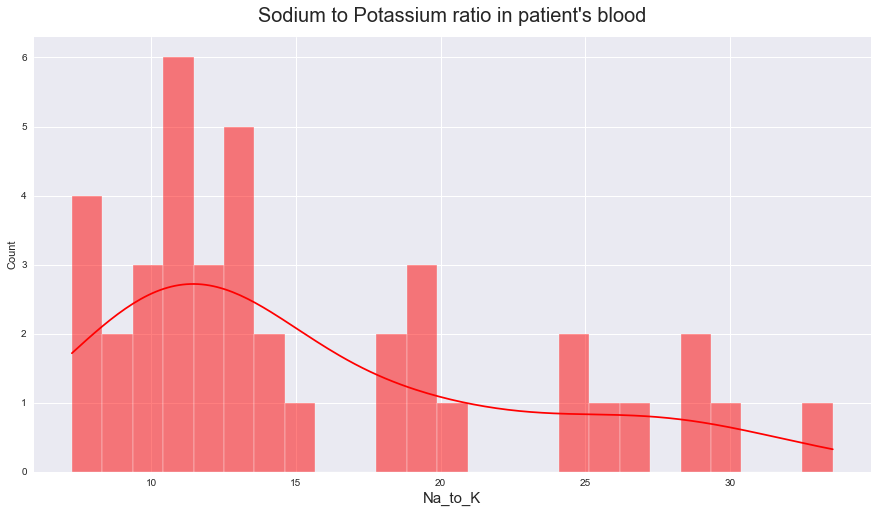

In [37]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(15,8))
sns.histplot(drug_test["Na_to_K"], color="red", kde=True, bins=25)
plt.title("Sodium to Potassium ratio in patient's blood", fontsize=20, y=1.02)
ax.set_xlabel("Na_to_K",fontsize=15);

Shape of your Data Set loaded: (40, 6)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  2
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    6 Predictors classified...
        This does not include the Target column(s)
        1 variables removed since they were ID or low-information variables


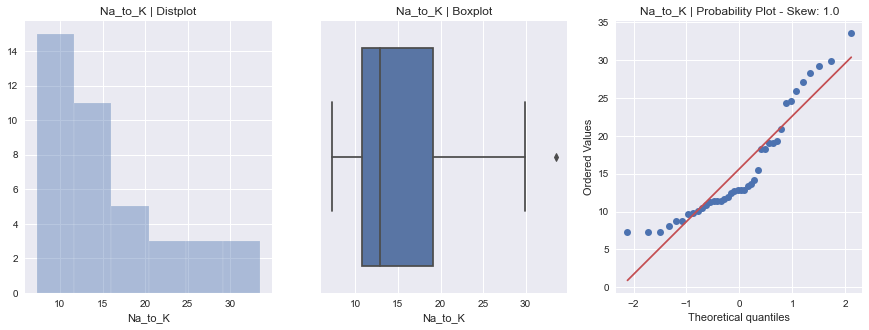

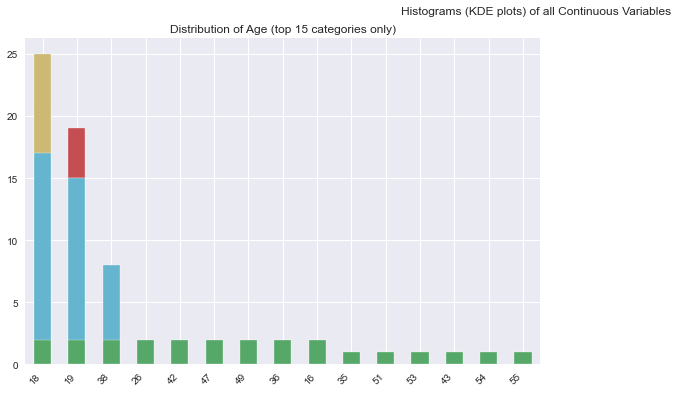

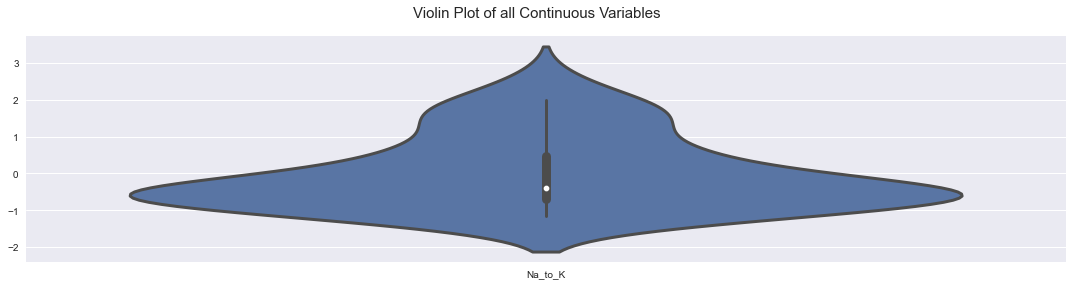

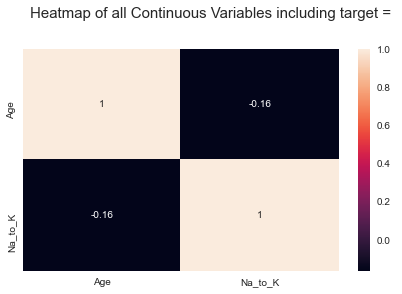

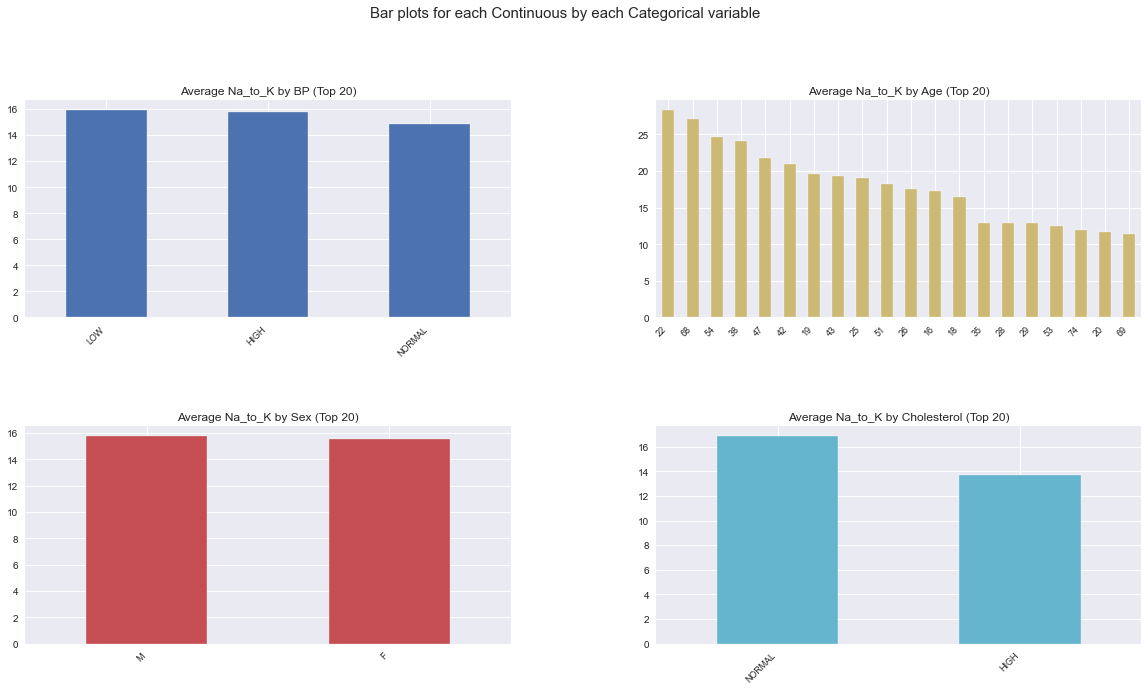

Time to run AutoViz (in seconds) = 1.027

 ###################### VISUALIZATION Completed ########################


In [38]:
AV = AutoViz_Class()
df_test_av = AV.AutoViz('D:/sharan personal/INSAID GCD PROGRAMME/Data Science Projects/Machine Learning Projects/Drug Prediction/drug_test.csv')

Data Preprocessing

In [39]:
drug_train['Cholesterol']

0      NORMAL
1        HIGH
2      NORMAL
3        HIGH
4        HIGH
        ...  
155      HIGH
156      HIGH
157      HIGH
158      HIGH
159      HIGH
Name: Cholesterol, Length: 160, dtype: object

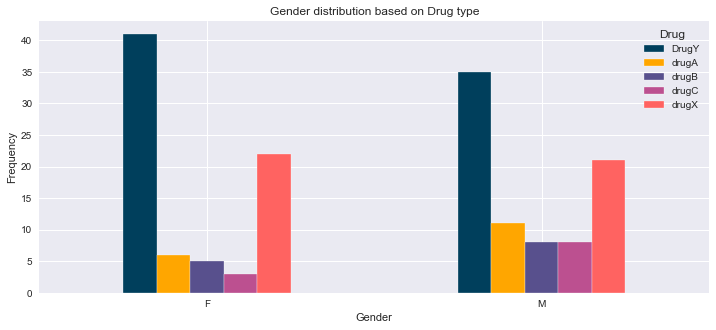

In [40]:
pd.crosstab(drug_train.Sex,drug_train.Drug).plot(kind="bar",figsize=(12,5),color=['#003f5c','#ffa600','#58508d','#bc5090','#ff6361'])
plt.title('Gender distribution based on Drug type')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()                                            #Gender distribution based on drug types on train datasets 

Label Encoding

In [41]:
drug_train['Sex'] = drug_train['Sex'].map({'M': 1, 'F': 0})
drug_train['BP'] = drug_train['BP'].map({'HIGH': 1, "NORMAL" : 2, "LOW" : 3})
drug_train['Cholesterol'] = drug_train['Cholesterol'].map({'HIGH': 1, "NORMAL" : 2})
drug_train['Drug'] = drug_train['Drug'].map({"DrugY":1, "drugC":2, "drugX":3, "drugA":4, "drugB":5})   #one hot encoding train data

In [42]:
drug_train.head() 

,Id,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,79,32,0,3,2,10.840,3
1,197,52,1,2,1,9.894,3
2,38,39,0,2,2,9.709,3
3,24,33,0,3,1,33.486,1
4,122,34,1,2,1,22.456,1


In [43]:
drug_test['Sex'] = drug_test['Sex'].map({'M': 1, 'F': 0})
drug_test['BP'] = drug_test['BP'].map({'HIGH': 1, "NORMAL" : 2, "LOW" : 3})
drug_test['Cholesterol'] = drug_test['Cholesterol'].map({'HIGH': 1, "NORMAL" : 2})   #one hot encoding test data

In [44]:
drug_test.head()

,Id,Age,Sex,BP,Cholesterol,Na_to_K
0,95,36,1,3,2,11.424
1,15,16,0,1,2,15.516
2,30,18,0,2,2,8.750
3,158,59,0,3,1,10.444
4,128,47,1,3,2,33.542


Exploratory Data Analysis

In [45]:
profile = ProfileReport(drug_train, title='Pandas Profiling after Data Preprocessing', minimal=True, progress_bar=False)
profile.to_notebook_iframe()

In [46]:
profile = ProfileReport(drug_test, title='Pandas Profiling after Data Preprocessing', minimal=True, progress_bar=False)
profile.to_notebook_iframe()

Text(0, 0.5, 'drug')

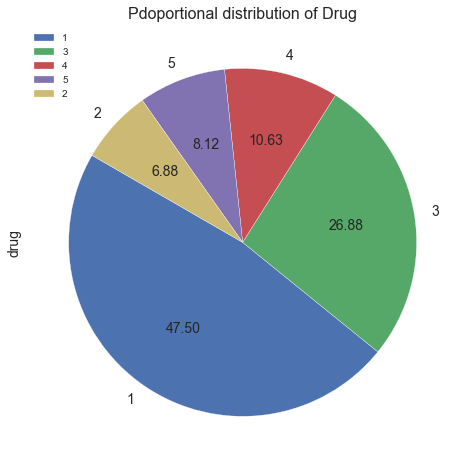

In [47]:
drug_train['Drug'].value_counts().plot(kind='pie', startangle=150, legend=True, figsize=(8,8), fontsize=14, autopct='%.2f')
plt.title('Pdoportional distribution of Drug', fontsize=16)
plt.ylabel('drug', fontsize=14)             #plotting dependent variable on Y column "Drug"

In [48]:
corr = drug_train.corr()
corr

,Id,Age,Sex,BP,Cholesterol,Na_to_K,Drug
Id,1.000000,0.025323,0.003545,-0.085614,0.068897,-0.023321,0.060293
Age,0.025323,1.000000,0.085598,0.118145,-0.086800,-0.042363,0.079425
Sex,0.003545,0.085598,1.000000,0.057679,-0.033944,-0.159304,0.103814
BP,-0.085614,0.118145,0.057679,1.000000,-0.065110,-0.046656,-0.276910
Cholesterol,0.068897,-0.086800,-0.033944,-0.065110,1.000000,-0.033720,0.083411
Na_to_K,-0.023321,-0.042363,-0.159304,-0.046656,-0.033720,1.000000,-0.675655
Drug,0.060293,0.079425,0.103814,-0.276910,0.083411,-0.675655,1.000000


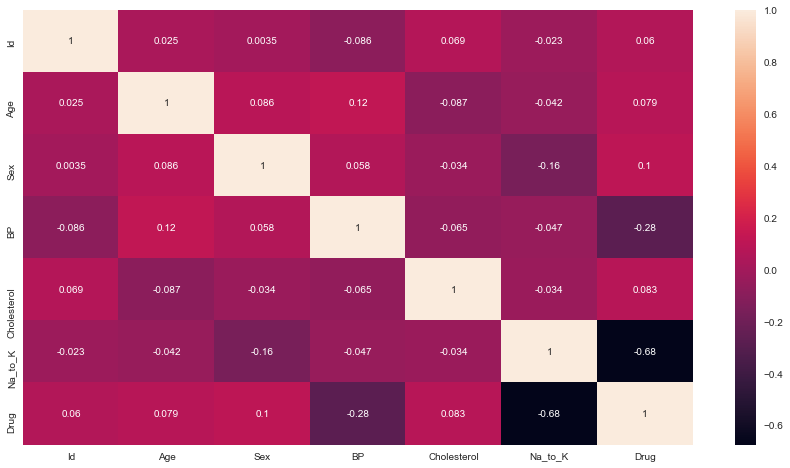

In [49]:
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
plt.show()

OBSERVATION:
The score of Na_to_k, BP, Sex is very low

Model Building
1. First we split the dataset into train and test

In [50]:
X_train = drug_train.drop("Drug", axis=1)
Y_train = drug_train["Drug"]

In [51]:
X_train.head()

,Id,Age,Sex,BP,Cholesterol,Na_to_K
0,79,32,0,3,2,10.840
1,197,52,1,2,1,9.894
2,38,39,0,2,2,9.709
3,24,33,0,3,1,33.486
4,122,34,1,2,1,22.456


In [52]:
Y_train.head()

0    3
1    3
2    3
3    1
4    1
Name: Drug, dtype: int64

In [53]:
print('X_train shape:' , X_train.shape)
print('Y_train shape:' , Y_train.shape)

X_train shape: (160, 6)
Y_train shape: (160,)


In [54]:
X_test = drug_test
print('X_test shape:' , X_test.shape)

X_test shape: (40, 6)


Logistic Regression

In [205]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train,Y_train)

LogisticRegression()

In [206]:
Y_pred_train = logreg_model.predict(X_train)
print(Y_pred_train)

[3 3 3 1 1 3 1 1 5 1 3 1 3 1 3 1 3 1 1 1 1 1 5 1 3 1 1 1 1 5 5 3 3 1 4 3 1
 5 4 3 3 1 1 4 4 1 5 3 1 4 1 1 1 1 1 1 3 1 3 1 1 3 5 3 1 4 3 1 3 3 1 1 1 3
 5 1 5 3 1 1 1 5 3 4 1 1 1 1 5 3 1 3 3 3 1 4 3 3 1 1 1 1 1 1 1 1 3 5 1 4 4
 1 1 1 1 1 3 1 1 3 1 1 1 1 3 5 1 1 3 3 1 1 1 1 3 3 3 3 1 3 3 1 3 1 5 3 1 3
 3 1 1 3 1 1 1 1 1 1 1 3]


In [207]:
print("Accuracy score of the train data is ", accuracy_score(Y_train, Y_pred_train))

Accuracy score of the train data is  0.75625


In [208]:
LRAcc = accuracy_score(Y_train, Y_pred_train)
print('Logistic Regression Train accuracy is: {:.2f}%'.format(LRAcc*100))

Logistic Regression Train accuracy is: 75.62%


In [209]:
Y_pred_test = logreg_model.predict(X_test)
print(Y_pred_test) 

[3 1 3 3 1 1 1 1 4 3 1 3 1 1 5 1 5 3 3 1 4 3 3 1 1 1 3 3 1 3 1 3 1 1 3 1 3
 1 1 1]


In [210]:
print("Accuracy score of the test data is ", accuracy_score(Y_test, Y_pred_test))

Accuracy score of the test data is  0.7


In [211]:
LRAcc = accuracy_score(Y_test, Y_pred_test)
print('Logistic Regression Test accuracy is: {:.2f}%'.format(LRAcc*100))

Logistic Regression Test accuracy is: 70.00%


Decision Tree

In [212]:
dtc_model = DecisionTreeClassifier(criterion='gini')
dtc_model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [213]:
Y_pred_train = dtc_model.predict(X_train)
print(Y_pred_train)

[3 3 3 1 1 2 1 1 1 3 3 1 3 1 3 1 4 1 1 1 4 1 5 1 3 1 1 1 1 5 3 3 3 5 4 3 1
 3 4 3 2 1 4 4 4 5 5 4 1 4 1 1 4 1 1 1 3 1 3 1 1 3 5 3 1 4 2 1 3 3 1 1 3 3
 5 1 5 3 1 1 1 5 2 4 1 1 1 4 3 3 1 2 1 1 3 5 3 3 1 1 1 1 1 1 5 3 2 4 1 4 4
 3 1 1 1 1 3 1 4 3 1 1 3 1 3 5 1 1 2 3 1 1 1 1 3 1 3 3 1 2 2 1 2 1 5 3 1 3
 1 1 1 3 1 1 1 3 3 1 1 2]


In [214]:
print("Accuracy score of the train data is ", accuracy_score(Y_train, Y_pred_train))

Accuracy score of the train data is  1.0


In [215]:
DTAcc = accuracy_score(Y_train, Y_pred_train)
print('Decision Tree Train accuracy is: {:.2f}%'.format(DTAcc*100))

Decision Tree Train accuracy is: 100.00%


In [216]:
Y_test = dtc_model.predict(X_test)
print(Y_test)

[3 1 3 2 1 1 1 3 4 3 4 3 1 4 5 1 5 3 2 1 5 3 3 1 1 1 2 3 1 3 1 2 2 1 4 1 3
 4 1 4]


In [217]:
print("Accuracy score of the test data is ", accuracy_score(Y_test, Y_pred_test))

Accuracy score of the test data is  0.7


In [218]:
DTAcc = accuracy_score(Y_test, Y_pred_test)
print('Decision Tree Test accuracy is: {:.2f}%'.format(DTAcc*100))

Decision Tree Test accuracy is: 70.00%


Random Forest

In [220]:
rf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
rf.fit(X_train,Y_train)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [221]:
Y_pred_train = rf.predict(X_train)
print(Y_pred_train)

[3 3 3 1 1 2 1 1 1 3 3 1 3 1 3 1 4 1 1 1 4 1 5 1 3 1 1 1 1 5 3 3 3 5 4 3 1
 3 4 3 2 1 4 4 4 5 5 4 1 4 1 1 4 1 1 1 3 1 3 1 1 3 5 3 1 4 2 1 3 3 1 1 3 3
 5 1 5 3 1 1 1 5 2 4 1 1 1 4 3 3 1 2 1 1 3 5 3 3 1 1 1 1 1 1 5 3 2 4 1 4 4
 3 1 1 1 1 3 1 4 3 1 1 3 1 3 5 1 1 2 3 1 1 1 1 3 1 3 3 1 2 2 1 2 1 5 3 1 3
 1 1 1 3 1 1 1 3 3 1 1 2]


In [222]:
print("Accuracy score of the train data is ", accuracy_score(Y_train, Y_pred_train))

Accuracy score of the train data is  1.0


In [223]:
RFAcc = accuracy_score(Y_train, Y_pred_train)
print('Random Forest Train accuracy is: {:.2f}%'.format(RFAcc*100))

Random Forest Train accuracy is: 100.00%


In [224]:
Y_pred_test = rf.predict(X_test)
print(Y_pred_test)

[3 1 3 3 1 1 1 3 4 3 4 3 1 4 5 1 5 3 3 1 5 3 3 1 1 1 2 3 1 3 1 2 2 1 4 1 3
 4 1 4]


In [225]:
print("Accuracy score of the test data is ", accuracy_score(Y_test, Y_pred_test))

Accuracy score of the test data is  0.95


In [226]:
RFAcc = accuracy_score(Y_test, Y_pred_test)
print('Random Forest Test accuracy is: {:.2f}%'.format(RFAcc*100))

Random Forest Test accuracy is: 95.00%


KNN Classifier

In [227]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [228]:
Y_pred_train = KNN.predict(X_train)
print(Y_pred_train)

[1 2 3 1 1 1 1 1 3 1 3 1 3 1 3 1 5 1 1 1 1 1 1 1 3 1 1 1 1 5 2 3 3 1 3 3 1
 1 2 3 2 1 3 4 2 5 2 3 1 1 1 1 1 1 1 1 3 2 3 1 1 3 5 5 1 4 1 5 3 1 1 1 2 1
 5 1 1 1 1 1 1 3 2 3 1 1 1 4 5 3 1 2 1 1 3 5 3 3 1 1 1 1 1 1 5 3 2 3 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 2 1 1 2 5 1 1 1 1 3 1 3 3 1 2 2 1 4 1 3 1 1 3
 1 1 1 3 1 1 1 1 2 1 1 2]


In [229]:
print("Accuracy score of the train data is ", accuracy_score(Y_train, Y_pred_train))

Accuracy score of the train data is  0.7125


In [230]:
KNNAcc = accuracy_score(Y_train, Y_pred_train)
print('KNN Train accuracy is: {:.2f}%'.format(KNNAcc*100))

KNN Train accuracy is: 71.25%


In [231]:
Y_pred_test = KNN.predict(X_test)
print(Y_pred_test)

[1 3 3 2 1 1 1 1 1 2 1 4 1 1 1 1 3 2 1 1 5 1 5 1 1 1 1 1 1 5 1 3 1 1 4 1 1
 3 1 1]


In [232]:
print("Accuracy score of the test data is ", accuracy_score(Y_test, Y_pred_test))

Accuracy score of the test data is  0.45


In [233]:
KNNAcc = accuracy_score(Y_test, Y_pred_test)
print('KNN Test accuracy is: {:.2f}%'.format(KNNAcc*100))

KNN Test accuracy is: 45.00%


SVM

In [234]:
SVM = svm.SVC(kernel='linear')
SVM.fit(X_train, Y_train)

SVC(kernel='linear')

In [235]:
Y_pred_train = SVM.predict(X_train)
print(Y_pred_train)

[3 3 3 1 1 2 1 1 1 3 3 1 3 1 3 1 4 1 1 1 4 1 5 1 3 1 1 1 1 5 3 3 3 5 4 3 1
 3 4 3 2 1 4 4 4 5 5 4 1 4 1 1 4 1 1 1 3 1 3 1 1 3 5 3 1 4 2 1 3 3 1 1 3 3
 5 1 5 3 1 1 1 5 2 4 1 1 1 4 3 3 1 2 1 1 3 5 3 3 1 1 1 1 1 1 5 3 2 4 1 4 4
 3 1 1 1 1 3 1 4 3 1 1 3 1 3 5 1 1 2 3 1 1 1 1 3 1 3 3 1 2 2 1 2 1 5 3 1 3
 1 1 1 3 1 1 1 3 3 1 1 2]


In [236]:
print("Accuracy score of the train data is ", accuracy_score(Y_train, Y_pred_train))

Accuracy score of the train data is  1.0


In [237]:
SVMAcc = accuracy_score(Y_train, Y_pred_train)
print('SVM Train accuracy is: {:.2f}%'.format(SVMAcc*100))

SVM Train accuracy is: 100.00%


In [238]:
Y_pred_test = SVM.predict(X_test)
print(Y_pred_test)

[3 4 3 2 1 1 1 3 4 3 4 3 1 4 5 1 5 3 2 1 5 3 3 1 1 1 2 3 1 3 1 2 2 1 4 1 3
 4 1 4]


In [239]:
print("Accuracy score of the test data is ", accuracy_score(Y_test, Y_pred_test))

Accuracy score of the test data is  0.975


In [240]:
SVMAcc = accuracy_score(Y_test, Y_pred_test)
print('SVM Test accuracy is: {:.2f}%'.format(SVMAcc*100))

SVM Test accuracy is: 97.50%


MODEL COMPARISON

In [253]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'Decision Tree', 'SVM', 'K Neighbors', 'Random Forest'], 
                        'Accuracy': [LRAcc*100, DTAcc*100, SVMAcc*100 , KNNAcc*100, RFAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
2,SVM,97.5
4,Random Forest,95.0
0,Logistic Regression,70.0
1,Decision Tree,70.0
3,K Neighbors,45.0


Text(0.5, 1.0, 'Drug Prediction - Model Accuracy')

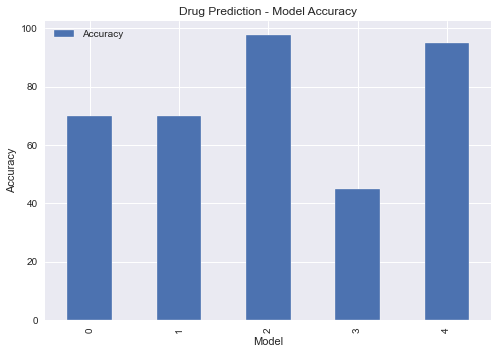

In [256]:
compare.plot(kind='bar')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Drug Prediction - Model Accuracy') 

In [257]:
y_sub_df = pd.DataFrame({'Id': drug_test['Id'], 'predictions': Y_pred_test})
y_sub_df.head()

,Id,predictions
0,95,3
1,15,4
2,30,3
3,158,2
4,128,1


In [258]:
y_sub_df.to_csv('submission.csv', index=False, header=False)